In [3]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
# df= pd.read_csv('fdia dataset/data1.csv')
df = pd.read_csv('merge/fdia.csv')
#80000 X 129

![columns in dataset](fdiacolumns.png)

For example, R1-PA1:VH means Phase A voltage phase angle measured by PMU R1

In [6]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)
accuracies = []

In [7]:
df['marker'].value_counts()

marker
Attack     55663
Natural    23008
Name: count, dtype: int64

In [8]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,12

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['marker'] = encoder.fit_transform(df['marker'])
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798.4572,-1

In [10]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<font color="lightseagreen" size=+2.5><b>XGBClassifier</b></font>

XGBClassifier :  
 Accuracy Score : 0.84
 Precision Score: 0.85
 Recall Score   : 0.56
 f1 Score       : 0.68 

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     10232
           1       0.85      0.56      0.68      4242

    accuracy                           0.84     14474
   macro avg       0.85      0.76      0.79     14474
weighted avg       0.84      0.84      0.83     14474
 



Text(0.5, 1.0, 'XGBClassifier Confusion Matrix')

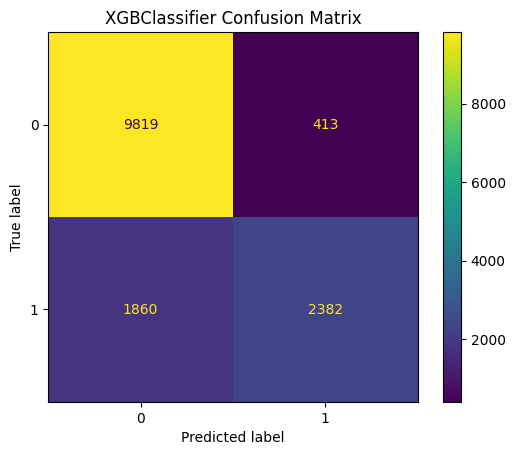

In [12]:
# XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGBClassifier = xgb.predict(X_test)
accuracies.append(accuracy_score(y_test,y_pred_XGBClassifier))
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print("XGBClassifier :  ")
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
cmap = sns.color_palette("gray", as_cmap=True)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_XGBClassifier)).plot()
plt.title('XGBClassifier Confusion Matrix')

<font color="lightseagreen" size=+2.5><b>LogisticRegressionClassifier</b></font>

LogisticRegressionClassifier:
 Train set score: 0.71
 Accuracy Score : 0.70
 Precision Score: 0.42
 Recall Score   : 0.03
 f1 Score       : 0.06 

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82     10232
           1       0.42      0.03      0.06      4242

    accuracy                           0.70     14474
   macro avg       0.57      0.51      0.44     14474
weighted avg       0.63      0.70      0.60     14474
 

 Confusion Matrix:
 [[10058   174]
 [ 4114   128]]


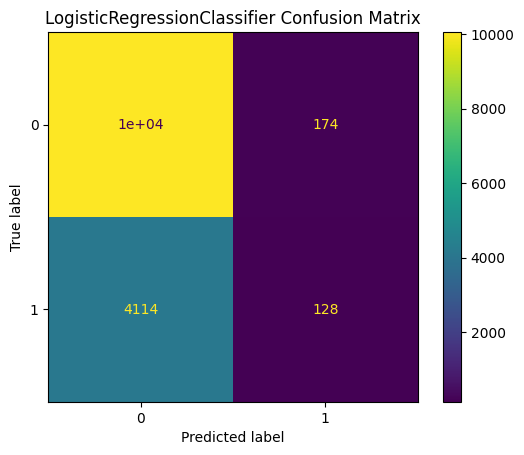

In [10]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_pred_LogisticRegression = lrc.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)
accuracies.append(accuracy_score(y_test,y_pred_LogisticRegression))

print("LogisticRegressionClassifier:")
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(lrc.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_LogisticRegression)).plot()

# plot_confusion_matrix(LogisticRegression, X_test, y_test);
plt.title('LogisticRegressionClassifier Confusion Matrix');

## SVM

SVM: 
 Train set score: 0.71
 Accuracy Score : 0.71
 Precision Score: 0.41
 Recall Score   : 0.01
 f1 Score       : 0.01 

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     10232
           1       0.41      0.01      0.01      4242

    accuracy                           0.71     14474
   macro avg       0.56      0.50      0.42     14474
weighted avg       0.62      0.71      0.59     14474
 

 Confusion Matrix:
 [[10187    45]
 [ 4211    31]]


Text(0.5, 1.0, 'SVM Confusion Matrix')

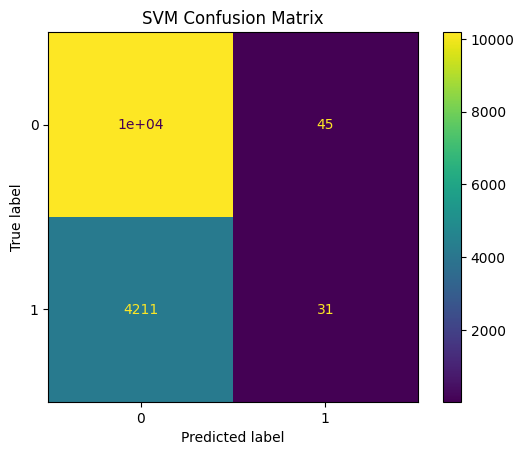

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score

svm = LinearSVC(C=1)

svm.fit(X_train, y_train)

y_pred_SVM = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_SVM)
accuracies.append(accuracy)

print("SVM: ")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_SVM)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_SVM), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_SVM)).plot()

plt.title('SVM Confusion Matrix')


Ensemble Model Accuracy(SVM+XGB,stacking): 0.8522177697941136
 Train set score: 0.29
 Accuracy Score : 0.85
 Precision Score: 0.81
 Recall Score   : 0.64
 f1 Score       : 0.72 

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     10232
           1       0.81      0.64      0.72      4242

    accuracy                           0.85     14474
   macro avg       0.84      0.79      0.81     14474
weighted avg       0.85      0.85      0.85     14474
 

 Confusion Matrix:
 [[9606  626]
 [1513 2729]]
Stacking Ensemble Model Accuracy: 0.8522177697941136


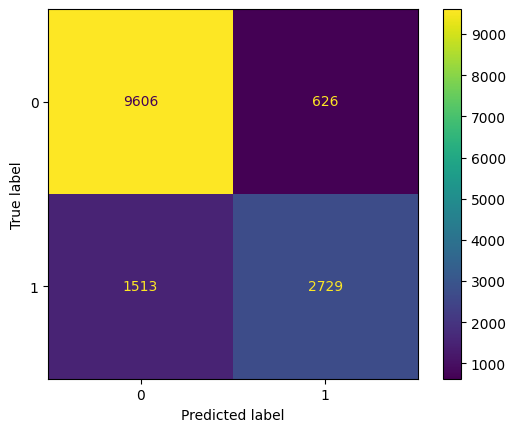

In [15]:
#stacking SVM + XGB
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(
    estimators=[('svm', svm), ('xgb', xgb)],
    final_estimator=svm 
)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
accuracies.append(accuracy)
print(f"Ensemble Model Accuracy(SVM+XGB,stacking): {accuracy}")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_stacking)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_stacking), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking)).plot()

print(f"Stacking Ensemble Model Accuracy: {accuracy}")

Ensemble Model Accuracy(SVM+LRC,stacking): 0.7050573442033992
 Train set score: 0.29
 Accuracy Score : 0.71
 Precision Score: 0.40
 Recall Score   : 0.01
 f1 Score       : 0.02 

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     10232
           1       0.40      0.01      0.02      4242

    accuracy                           0.71     14474
   macro avg       0.55      0.50      0.43     14474
weighted avg       0.62      0.71      0.59     14474
 

 Confusion Matrix:
 [[10152    80]
 [ 4189    53]]
Stacking Ensemble Model Accuracy: 0.7050573442033992


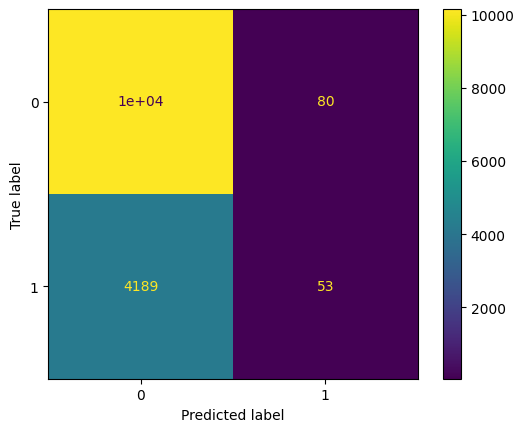

In [16]:
#stacking SVM + LRC
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(
    estimators=[('svm', svm), ('lrc', lrc)],
    final_estimator=svm 
)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
accuracies.append(accuracy)
print(f"Ensemble Model Accuracy(SVM+LRC,stacking): {accuracy}")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_stacking)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_stacking), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking)).plot()

print(f"Stacking Ensemble Model Accuracy: {accuracy}")